In [1]:
import scanpy as sc
import scFates as scf

In [2]:
adata=sc.read_csv("UMAP.csv.gz")

In [3]:
adata.obsm["X_umap"]=adata.X

In [4]:
import time
duration_elpi=list()
for n in [10,20,30,40]:
    start = time.time()
    scf.tl.tree(adata,Nodes=n,method="epg",seed=42,device="gpu",use_rep="X_umap")
    end = time.time()
    duration_elpi.append(end-start)


inferring a principal tree --> parameters used 
    10 principal points, mu = 0.1, lambda = 0.01
    finished (0:00:26) --> added 
    .uns['epg'], dictionnary containing inferred tree.
    .obsm['X_R'] soft assignment of cells to principal points.
    .uns['graph']['B'] adjacency matrix of the principal points.
    .uns['graph']['F'] coordinates of principal points in representation space.
inferring a principal tree --> parameters used 
    20 principal points, mu = 0.1, lambda = 0.01
    finished (0:01:48) --> added 
    .uns['epg'], dictionnary containing inferred tree.
    .obsm['X_R'] soft assignment of cells to principal points.
    .uns['graph']['B'] adjacency matrix of the principal points.
    .uns['graph']['F'] coordinates of principal points in representation space.
inferring a principal tree --> parameters used 
    30 principal points, mu = 0.1, lambda = 0.01
    finished (0:05:02) --> added 
    .uns['epg'], dictionnary containing inferred tree.
    .obsm['X_R'] soft assi

In [6]:
import time
duration_ppt_cpu=list()
for n in [100,300,600,1000]:
    start = time.time()
    scf.tl.tree(adata,Nodes=n,method="ppt",ppt_err_cut=0.00000001,
                seed=42,device="cpu",use_rep="X_umap")
    end = time.time()
    duration_ppt_cpu.append(end-start)



inferring a principal tree --> parameters used 
    100 principal points, sigma = 0.1, lambda = 1, metric = euclidean
    fitting: 100%|██████████| 50/50 [00:19<00:00,  2.57it/s]
    not converged (error: 0.016729689952186762)
    finished (0:00:20) --> added 
    .uns['ppt'], dictionnary containing inferred tree.
    .obsm['X_R'] soft assignment of cells to principal points.
    .uns['graph']['B'] adjacency matrix of the principal points.
    .uns['graph']['F'] coordinates of principal points in representation space.
inferring a principal tree --> parameters used 
    300 principal points, sigma = 0.1, lambda = 1, metric = euclidean
    fitting: 100%|██████████| 50/50 [01:16<00:00,  1.54s/it]
    not converged (error: 0.03421355425015471)
    more than 30 tips detected!
    finished (0:01:20) --> added 
    .uns['ppt'], dictionnary containing inferred tree.
    .obsm['X_R'] soft assignment of cells to principal points.
    .uns['graph']['B'] adjacency matrix of the principal points.
 

In [7]:
#one run to compile cuda code
scf.tl.tree(adata,Nodes=n,method="ppt",ppt_err_cut=0.00000001,
                seed=42,device="gpu",use_rep="X_umap")

inferring a principal tree --> parameters used 
    1000 principal points, sigma = 0.1, lambda = 1, metric = euclidean
    fitting: 100%|██████████| 50/50 [00:32<00:00,  1.54it/s]
    inference not converged (error: 0.005064115146122603)
    more than 30 tips detected!
    finished (0:00:37) --> added 
    .uns['ppt'], dictionnary containing inferred tree.
    .obsm['X_R'] soft assignment of cells to principal points.
    .uns['graph']['B'] adjacency matrix of the principal points.
    .uns['graph']['F'] coordinates of principal points in representation space.


In [8]:
import time
duration_ppt_gpu=list()
for n in [100,300,600,1000]:
    start = time.time()
    scf.tl.tree(adata,Nodes=n,method="ppt",ppt_err_cut=0.00000001,
                seed=42,device="gpu",use_rep="X_umap")
    end = time.time()
    duration_ppt_gpu.append(end-start)

inferring a principal tree --> parameters used 
    100 principal points, sigma = 0.1, lambda = 1, metric = euclidean
    fitting: 100%|██████████| 50/50 [00:07<00:00,  6.95it/s]
    inference not converged (error: 0.016729689950707734)
    finished (0:00:07) --> added 
    .uns['ppt'], dictionnary containing inferred tree.
    .obsm['X_R'] soft assignment of cells to principal points.
    .uns['graph']['B'] adjacency matrix of the principal points.
    .uns['graph']['F'] coordinates of principal points in representation space.
inferring a principal tree --> parameters used 
    300 principal points, sigma = 0.1, lambda = 1, metric = euclidean
    fitting: 100%|██████████| 50/50 [00:11<00:00,  4.20it/s]
    inference not converged (error: 0.03421355425634292)
    more than 30 tips detected!
    finished (0:00:13) --> added 
    .uns['ppt'], dictionnary containing inferred tree.
    .obsm['X_R'] soft assignment of cells to principal points.
    .uns['graph']['B'] adjacency matrix of the

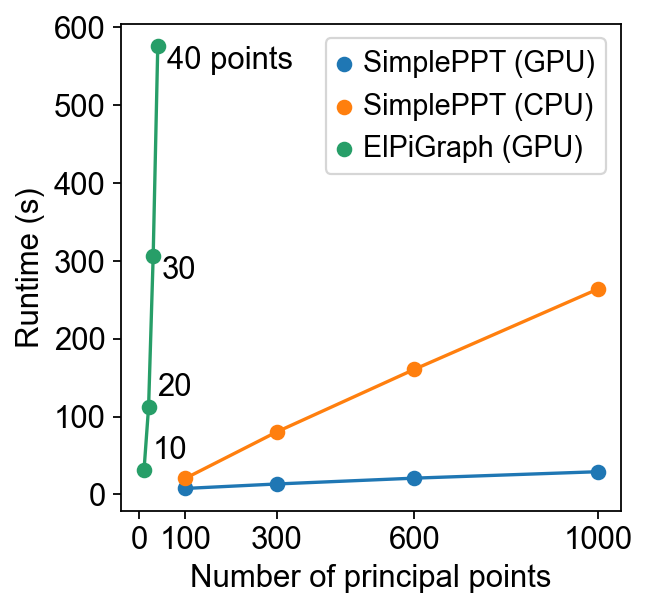

In [9]:
import matplotlib.pyplot as plt
sc.set_figure_params()
scf.set_figure_pubready()
plt.plot([100,300,600,1000],duration_ppt_gpu)
plt.scatter([100,300,600,1000],duration_ppt_gpu,label="SimplePPT (GPU)")
plt.plot([100,300,600,1000],duration_ppt_cpu)
plt.scatter([100,300,600,1000],duration_ppt_cpu,label="SimplePPT (CPU)")
plt.plot([10,20,30,40],duration_elpi)
plt.scatter([10,20,30,40],duration_elpi, label="ElPiGraph (GPU)")
plt.legend()
plt.grid(False)
plt.xlabel("Number of principal points")
plt.ylabel("Runtime (s)")
plt.annotate("40 points", xy=(40,duration_elpi[3]),xytext=(4,-10),textcoords="offset points")
plt.annotate("30", xy=(30,duration_elpi[2]),xytext=(4,-10),textcoords="offset points")
plt.annotate("20", xy=(20,duration_elpi[1]),xytext=(4,5),textcoords="offset points")
plt.annotate("10", xy=(10,duration_elpi[0]),xytext=(4,5),textcoords="offset points")
plt.xticks([0,100,300,600,1000])
plt.savefig("Runtime_tree_learning.pdf")